# K-Nearest Neighbors (KNN) Algorithm

In machine learning, the k-nearest neighbors (KNN) algorithm is a supervised and non-parametric classification method used for both classificationa and regression, but it is more widely used for classification. It is considered a non-parametric method because it does not make any assumptions about the underlying data distribution.

![A Quick Overview of KNN](k-nearest-neighbor-algorithm.png)

The KNN algorithm:
1. In both cases, the input consists of the k closest training examples in a data set. Choose $k \in Z^{+}$
2. The output depends on whether KNN is used for classification or regression:
   - KNN classification: the intuition is that data with similar features should be close in splace. Thus, KNN classification involves classifying an unobserved new data point by a plurality vote of its k nearest annotated data points. Then, the new data point will be assigned to the class most common among its k nearest neighbors.
   - KNN regression: the output is the property value for the object. This value is the average of the values of k nearest neighbors. The formula is shown below:

$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}
$$


Drawbacks of KNN algorithm:
- Curse of dimensionality: we usually just consider a two dimentional space, but as the number of dimensions increases, the amount of freedom for feature vectors to move around increases significantly. Every point is far away from every point else.
- Computational expensive: we need to compute the distance between the object and every single data points around it, so KNN is not used on extremely large datasets.

Things we need to pay special attention to:
- Choice of k: for classificaiton, k should be odd.
- Measure of performance: use error $E = \frac{1}{M}\sum_{i = 1}^{M} (y_i \neq \tilde{y_i})$.



# My Implementation on Diabetes Dataset

I choose the diabetes dataset to implement the KNN algorithm. There are 9 variables in total:

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

Among them, "Outcome" is our target variable, which has two possible values: 1 for "diagonosed with diabetes", and 0 for "NOT diagnosed with diabetes".

In [680]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the diabetes data
df = pd.read_csv('diabetes.csv')

In [681]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's take a look at some features of the diabetes dataset.

In [688]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Randomly plot two features "Glucose" and "Blood Pressure". Purple represents "NOT diagnosed with diabetes".

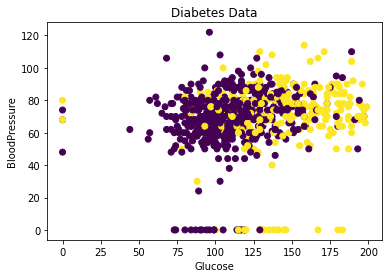

In [689]:
plt.scatter(df['Glucose'],
            df['BloodPressure'], 
            c = df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Diabetes Data')
plt.show()

Now, plot all other combinations of features.

In [684]:
from itertools import combinations

In [685]:
# Since there are too many variables, we selectively ignore variable "Pregnancies"
L = list(x for x in combinations(df.iloc[: , 1:8].columns, 2))

In [686]:
L

[('Glucose', 'BloodPressure'),
 ('Glucose', 'SkinThickness'),
 ('Glucose', 'Insulin'),
 ('Glucose', 'BMI'),
 ('Glucose', 'DiabetesPedigreeFunction'),
 ('Glucose', 'Age'),
 ('BloodPressure', 'SkinThickness'),
 ('BloodPressure', 'Insulin'),
 ('BloodPressure', 'BMI'),
 ('BloodPressure', 'DiabetesPedigreeFunction'),
 ('BloodPressure', 'Age'),
 ('SkinThickness', 'Insulin'),
 ('SkinThickness', 'BMI'),
 ('SkinThickness', 'DiabetesPedigreeFunction'),
 ('SkinThickness', 'Age'),
 ('Insulin', 'BMI'),
 ('Insulin', 'DiabetesPedigreeFunction'),
 ('Insulin', 'Age'),
 ('BMI', 'DiabetesPedigreeFunction'),
 ('BMI', 'Age'),
 ('DiabetesPedigreeFunction', 'Age')]

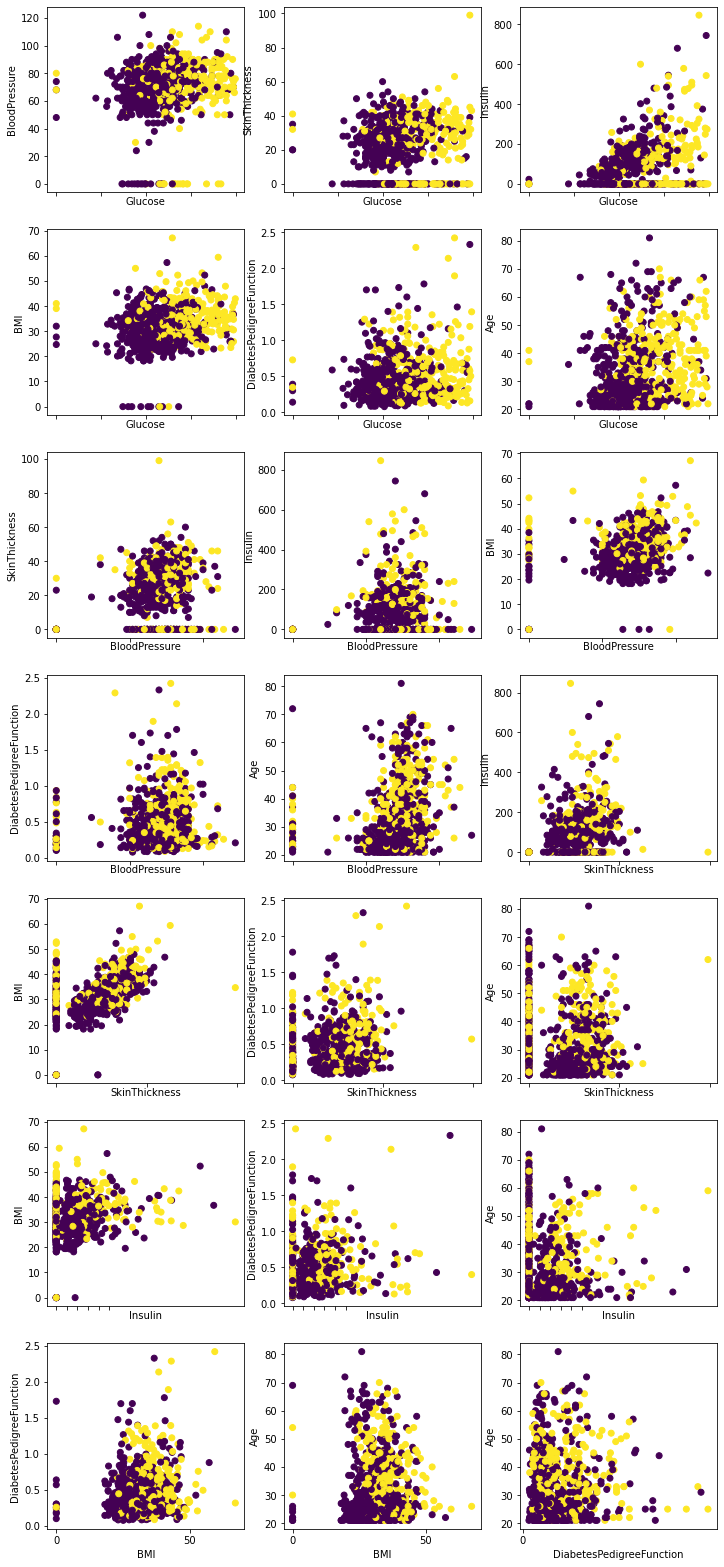

In [687]:
fig, ax = plt.subplots(nrows = 7, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 28))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2),
                    (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2),
                    (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2),
                    (6, 0), (6, 1), (6, 2)]):
    ax[q[0], q[1]].scatter(df.iloc[: , 1:8][p[0]],
                           df.iloc[: , 1:8][p[1]],
                           c = df['Outcome'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])
    remove = ax[q[0], q[1]]
    shax = remove.get_shared_x_axes()
    shax.remove(remove)
    
plt.show()

From the above plots, we see that the two colors are not as clearly seperated as those from the iris dataset we used in class. Thus, we may need larger k for this dataset. However, those combinations with "Glucose" tend to have relatively clearer classification boundaries. Here, we choose "Glucose" and "Diabetes Pedigree Function" to implement the KNN algorithm.

In [722]:
X = df[['Glucose', 'DiabetesPedigreeFunction']].to_numpy()
y = df['Outcome'].to_numpy()

Let's split X and y into training sets and testing sets.

In [723]:
from sklearn.model_selection import train_test_split

In [724]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

Define a function to compute distance between points:

In [726]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [727]:
distance(X[10], X[35])

7.0427711165421245

Define a function to implement the KNN algorithm:

In [728]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Test the function for k = 15:

In [731]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 15)

[[array([101.   ,   0.336]), 0, 0.27799999999999997],
 [array([101.   ,   0.252]), 0, 0.362],
 [array([101.   ,   0.198]), 0, 0.416],
 [array([101.   ,   0.155]), 0, 0.45899999999999996],
 [array([101.   ,   1.136]), 1, 0.5219999999999999],
 [array([100.   ,   0.658]), 0, 1.0009675319409717],
 [array([100.   ,   0.661]), 1, 1.0011038907126473],
 [array([102.   ,   0.665]), 1, 1.0012996554478584],
 [array([100.   ,   0.666]), 0, 1.0013510872815787],
 [array([102.   ,   0.674]), 0, 1.0017983829094554],
 [array([100.   ,   0.498]), 0, 1.0067055180140814],
 [array([102.   ,   0.496]), 0, 1.0069379325459937],
 [array([100.   ,   0.484]), 1, 1.0084145972763385],
 [array([100.   ,   0.444]), 0, 1.014347080638575],
 [array([100.   ,   0.412]), 1, 1.0201980199941578]]

In [732]:
y_test[-1]

0

Define a function to predict the testing set:

In [733]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Define a function to compute errors:

In [734]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/k

In [736]:
classification_error(X_test, y_test, X_train, y_train, 15)

4.933333333333334

Let's plot how errors vary among differnt k values.

In [737]:
possible_k = [x for x in range(12, 50, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

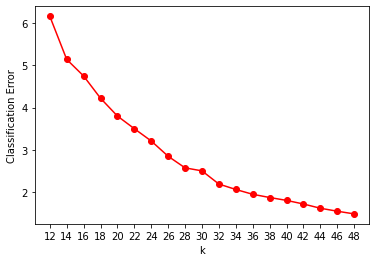

In [738]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

The errors decrease significantly from k = 12 to k = 50. We choose k = 17 to implement KNN and plot the predicted values and the actual values.

In [739]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                17) for point in X_test]

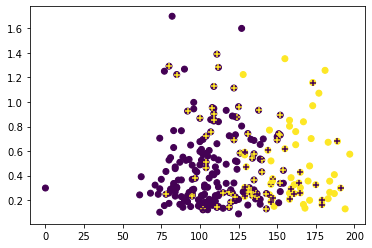

In [740]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

The above plot shows that there are still many misclassifications under k = 17.

Now, let's try KNeighborsClassifier from sklearn.neighbors to implement KNN with k = 17.

In [741]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [742]:
y_pred = neigh.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [743]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

We use F1 score to measure the performace under this method.
$$
F1 = \frac{TP}{TP + \frac{1}{2}(FP + FN)}
$$

TP = true positives

FP = false positives

FN = false negatives

In [744]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.4861111111111111


Now, set "Glucose" and "BMI" as X, and "Diabetes Pedigree Function" as y so that we can predict "Diabetes Pedigree Function" based on "Glucose" and "BMI".

In [745]:
X = df[['Glucose', 'BMI']].to_numpy()
y = df['DiabetesPedigreeFunction'].to_numpy()

Again, split X and y into training set and testing set.

In [746]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [747]:
predicted_labels = [KNN_Predict(point, 
                                X_train, 
                                y_train, 
                                3,
                                regression = True)
                    for point in X_test]

Compute the distance between the actual y values and the predicted values.

In [748]:
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

5.560815218013353

Plot the actual values in blue and the predicted values in orange:

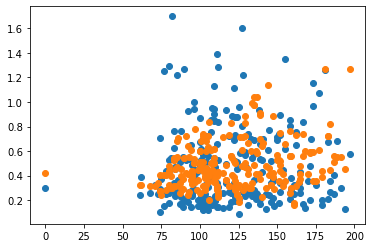

In [749]:
plt.scatter(X_test[:, 0], y_test)


plt.scatter(X_test[:, 0], predicted_labels)